In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wine = load_wine()
# wine

In [3]:
wine.feature_names
# wine.target_names
# wine.target
# wine.data

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# plt.scatter(wine.data[:,0], wine.data[:,5], s = 30, c = wine.target)

# plt.ylabel(wine.feature_names[5])
# plt.xlabel(wine.feature_names[0])

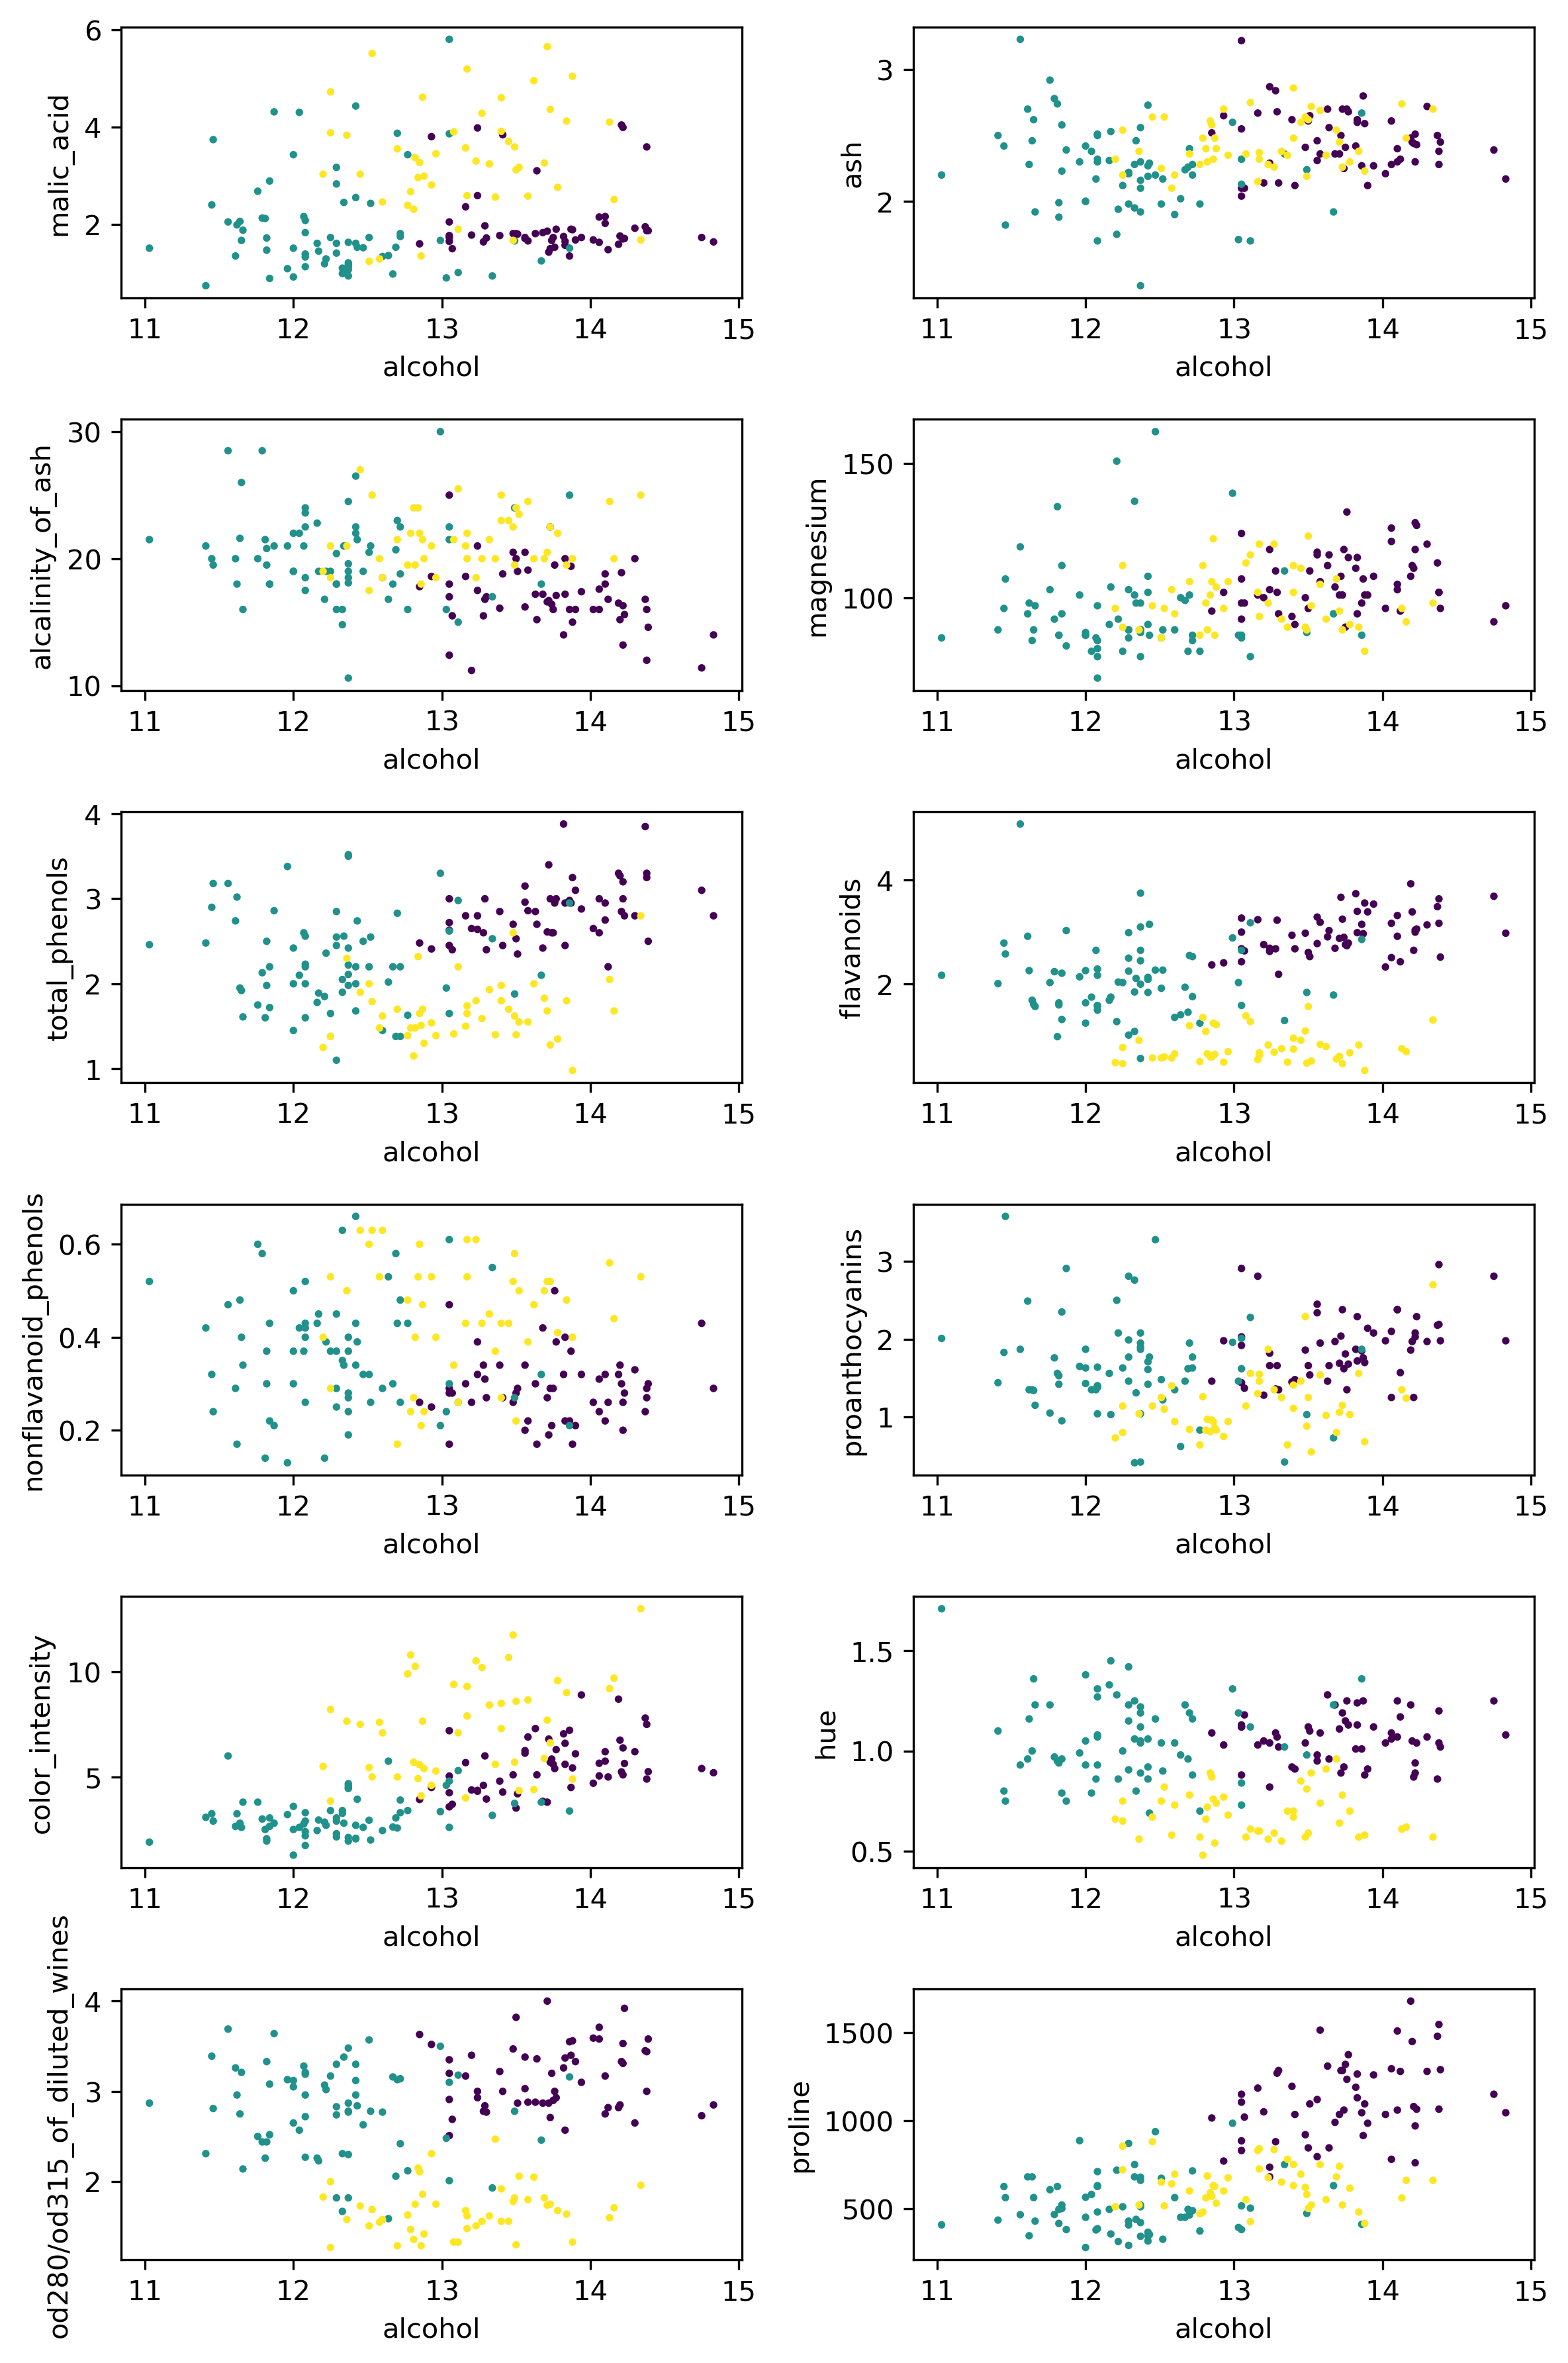

In [5]:
nrows, ncols = 6, 2
fig1 = plt.figure(figsize = (8,12), dpi = 300)

for i in range(1, 13):
    ax = fig1.add_subplot(nrows, ncols, i)
    ax.scatter(wine.data[:,0], wine.data[:,i],s=3,c = wine.target)
    ax.set_xlabel(wine.feature_names[0],fontsize=10)
    ax.set_ylabel(wine.feature_names[i],fontsize=10)

plt.tight_layout()

Figure 1: Exploratory property-property plots of the sklearn wine data set colored by target. There are some really defined groups that should be easily classified. I think this dataset will work well. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [7]:
X = wine.data
y = wine.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33333,random_state=50)

print(X_train.shape)
print(X_test.shape)

(118, 13)
(60, 13)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# this link is only miniumally helpful. 
# https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/

from sklearn.neural_network import MLPClassifier

# the following code will create a classifier with three layers of 10 nodes each
# max_iter refers to the number of epochs, one epoch is a combination of one cycle of 
# feed-forward and back propagation phase.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,random_state=10)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=10)

In [10]:
# metrics.accuracy_score(y_test,predictions)

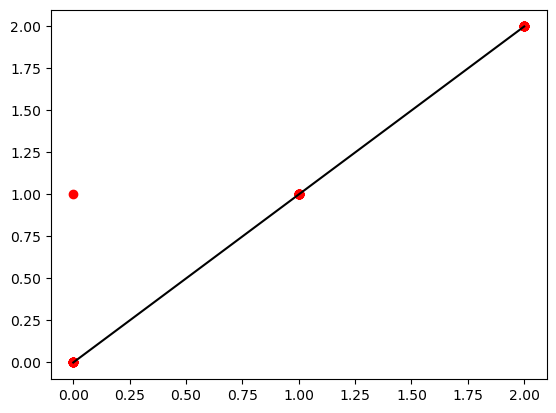

In [11]:
# try makign some predictions using your classifier
predictions = mlp.predict(X_test)

plt.plot(y_test, predictions, 'ro')
plt.plot([0, 2], [0, 2],'k')

In [12]:
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[15  1  0]
 [ 0 27  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        27
           2       1.00      1.00      1.00        17

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



When I first started doing this, I was getting accuracy score of 1 which just gave me the heebeejeebees so I tried a couple random states, turns out random state=1 gives a perfect score. So we decided on 10 because in real world... perfect isn't perfect and random isn't random. It's spring break I am allowed to be philsophical. (read this like a message). 

In [13]:
# layers=np.array([[10],[10,20],[10,20,30],[10,20,30,10],[10,20,30,10,20,30]])
# layers[3]

In [14]:
# # # now build a loop to test how well different number of hidden layers performs

# scores = {}
# scores_list = []

# factor=10
# l_range = range(1, 5, 1)

# from sklearn import metrics

# for l in l_range:
#     print(l)
#     print(layers[l]*factor)
#     mlp = MLPClassifier(hidden_layer_sizes=(layers[l]*factor), max_iter=1000)
#     mlp.fit(X_train, y_train)
#     y_pred = mlp.predict(X_test)
#     scores[l] = metrics.accuracy_score(y_test,y_pred)
#     scores_list.append(metrics.accuracy_score(y_test,y_pred))


In [15]:

layer={}
layers_list=[]

l_range = range(1, 51, 1)
for l in l_range:
    layer[l] = range(1, l, 1)
    layers_list.append(range(1, l, 1))


layers_list[0]

range(1, 1)

We have incrementally larger layers. Meaning layer 1 always has 1 neuron and layer 2 always has two. We loop through the number of layers and by default change the number of neurons in a layer. 

1
range(1, 2)
2
range(1, 3)


/Users/frank/opt/anaconda3/envs/OEAS895environment/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/frank/opt/anaconda3/envs/OEAS895environment/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


3
range(1, 4)


/Users/frank/opt/anaconda3/envs/OEAS895environment/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4
range(1, 5)


/Users/frank/opt/anaconda3/envs/OEAS895environment/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5
range(1, 6)
6
range(1, 7)
7
range(1, 8)
[[16  0  0]
 [ 4 23  0]
 [ 0  1 16]]


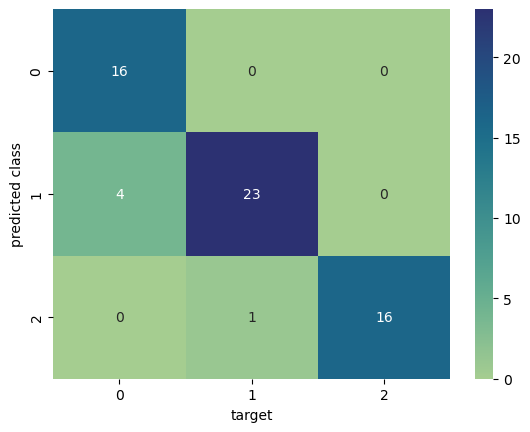

              precision    recall  f1-score   support

     class_0       0.80      1.00      0.89        16
     class_1       0.96      0.85      0.90        27
     class_2       1.00      0.94      0.97        17

    accuracy                           0.92        60
   macro avg       0.92      0.93      0.92        60
weighted avg       0.93      0.92      0.92        60

8
range(1, 9)
9
range(1, 10)
10
range(1, 11)
11
range(1, 12)
12
range(1, 13)
[[16  0  0]
 [ 3 24  0]
 [ 0  1 16]]


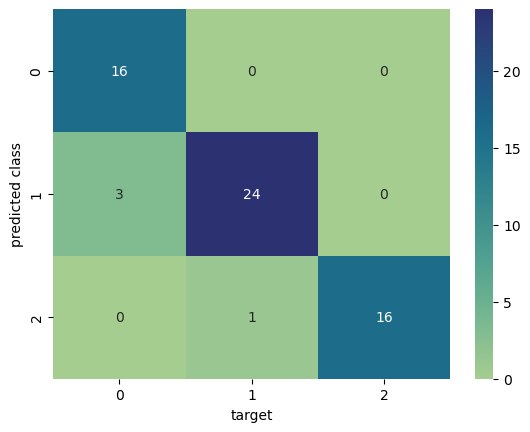

              precision    recall  f1-score   support

     class_0       0.84      1.00      0.91        16
     class_1       0.96      0.89      0.92        27
     class_2       1.00      0.94      0.97        17

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

13
range(1, 14)
14
range(1, 15)
15
range(1, 16)
16
range(1, 17)
17
range(1, 18)
18
range(1, 19)
19
range(1, 20)
20
range(1, 21)
21
range(1, 22)
22
range(1, 23)
23
range(1, 24)
24
range(1, 25)
25
range(1, 26)
26
range(1, 27)
27
range(1, 28)
28
range(1, 29)
29
range(1, 30)
30
range(1, 31)
31
range(1, 32)
32
range(1, 33)
33
range(1, 34)
34
range(1, 35)
35
range(1, 36)
36
range(1, 37)
37
range(1, 38)
38
range(1, 39)
39
range(1, 40)
40
range(1, 41)
41
range(1, 42)
42
range(1, 43)
43
range(1, 44)
44
range(1, 45)
45
range(1, 46)
46
range(1, 47)
47
range(1, 48)
48
range(1, 49)
49
range(1, 50)


In [16]:
import seaborn as sns

scores = {}
scores_list = []

min_score=0.9
l_range = range(1, 50, 1)

for l in l_range:
    print(l)
    print(layers_list[l])
    mlp = MLPClassifier(hidden_layer_sizes=(layers_list[l]), max_iter=1000,random_state=1)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores[l] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
    if scores[l] > min_score:
        confuse_me = metrics.confusion_matrix(y_test,y_pred)
        print(confuse_me)
        plt.figure()
        sns.heatmap(confuse_me,annot=True,cmap='crest')
        plt.ylabel("predicted class")
        plt.xlabel("target")
        plt.show()
        print(metrics.classification_report(y_test,y_pred,target_names=wine.target_names))     
    

Figures in output above: There are two outputted confusion matrices using random state = 2 for the given set of hidden layers looped. 


Pretty colors here, dark blue showing right down the diagonal where we want it for classifers with accuracy above 0.9.
We refined back to random state 1, because at 10 we couldn't get above 0.9. 
Layer/neuron input discussion: The 12 layer classifer performed slightly better in both the precision and recall than the 7 layer classifier. 
Moving through classes 0-2, false positives decreased. This is actually a feature of class 1 predictions actually being class 0 targets. 

Text(0, 0.5, 'accuracy score')

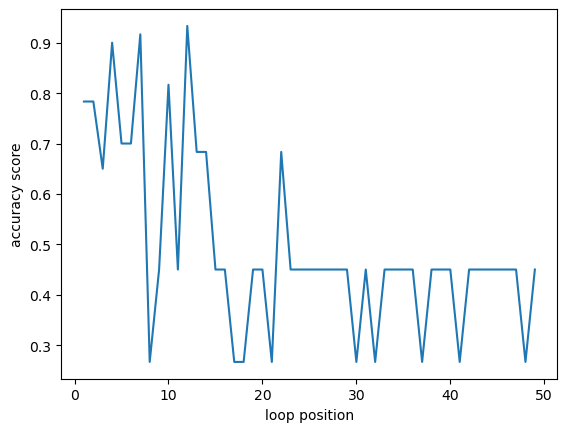

In [17]:
plt.plot(l_range,scores_list)
plt.xlabel('loop position')
plt.ylabel('accuracy score')

In [18]:
winner = scores_list.index(max(scores_list))

print('And the winning hidden layer number is:', l_range[winner])
print('with a accuracy score of', scores_list[winner],'!')

And the winning hidden layer number is: 12
with a accuracy score of 0.9333333333333333 !


In [19]:
# rerun so mlp object is the winner. 
mlp = MLPClassifier(hidden_layer_sizes=(layers_list[l_range[winner]]), max_iter=1000,random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=range(1, 13), max_iter=1000, random_state=1)

The number of layers/hidden layer positon is 7 & 12, however the list index positon in scores list is 6 and 11 respectively; python be confusing like that... something about indexing code above is broke.... I went in circles for awhile. I'll figure it out eventually, but I'd rather go forward in life. 

In [20]:
urlfile="https://media.githubusercontent.com/media/sophieclayton/OEAS805_envdatasci/master/data/unknown_wine.csv"

unknown_wine=pd.read_csv(urlfile)
print(unknown_wine.columns)
print(wine.feature_names)
# unknown_wine['alcohol']

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


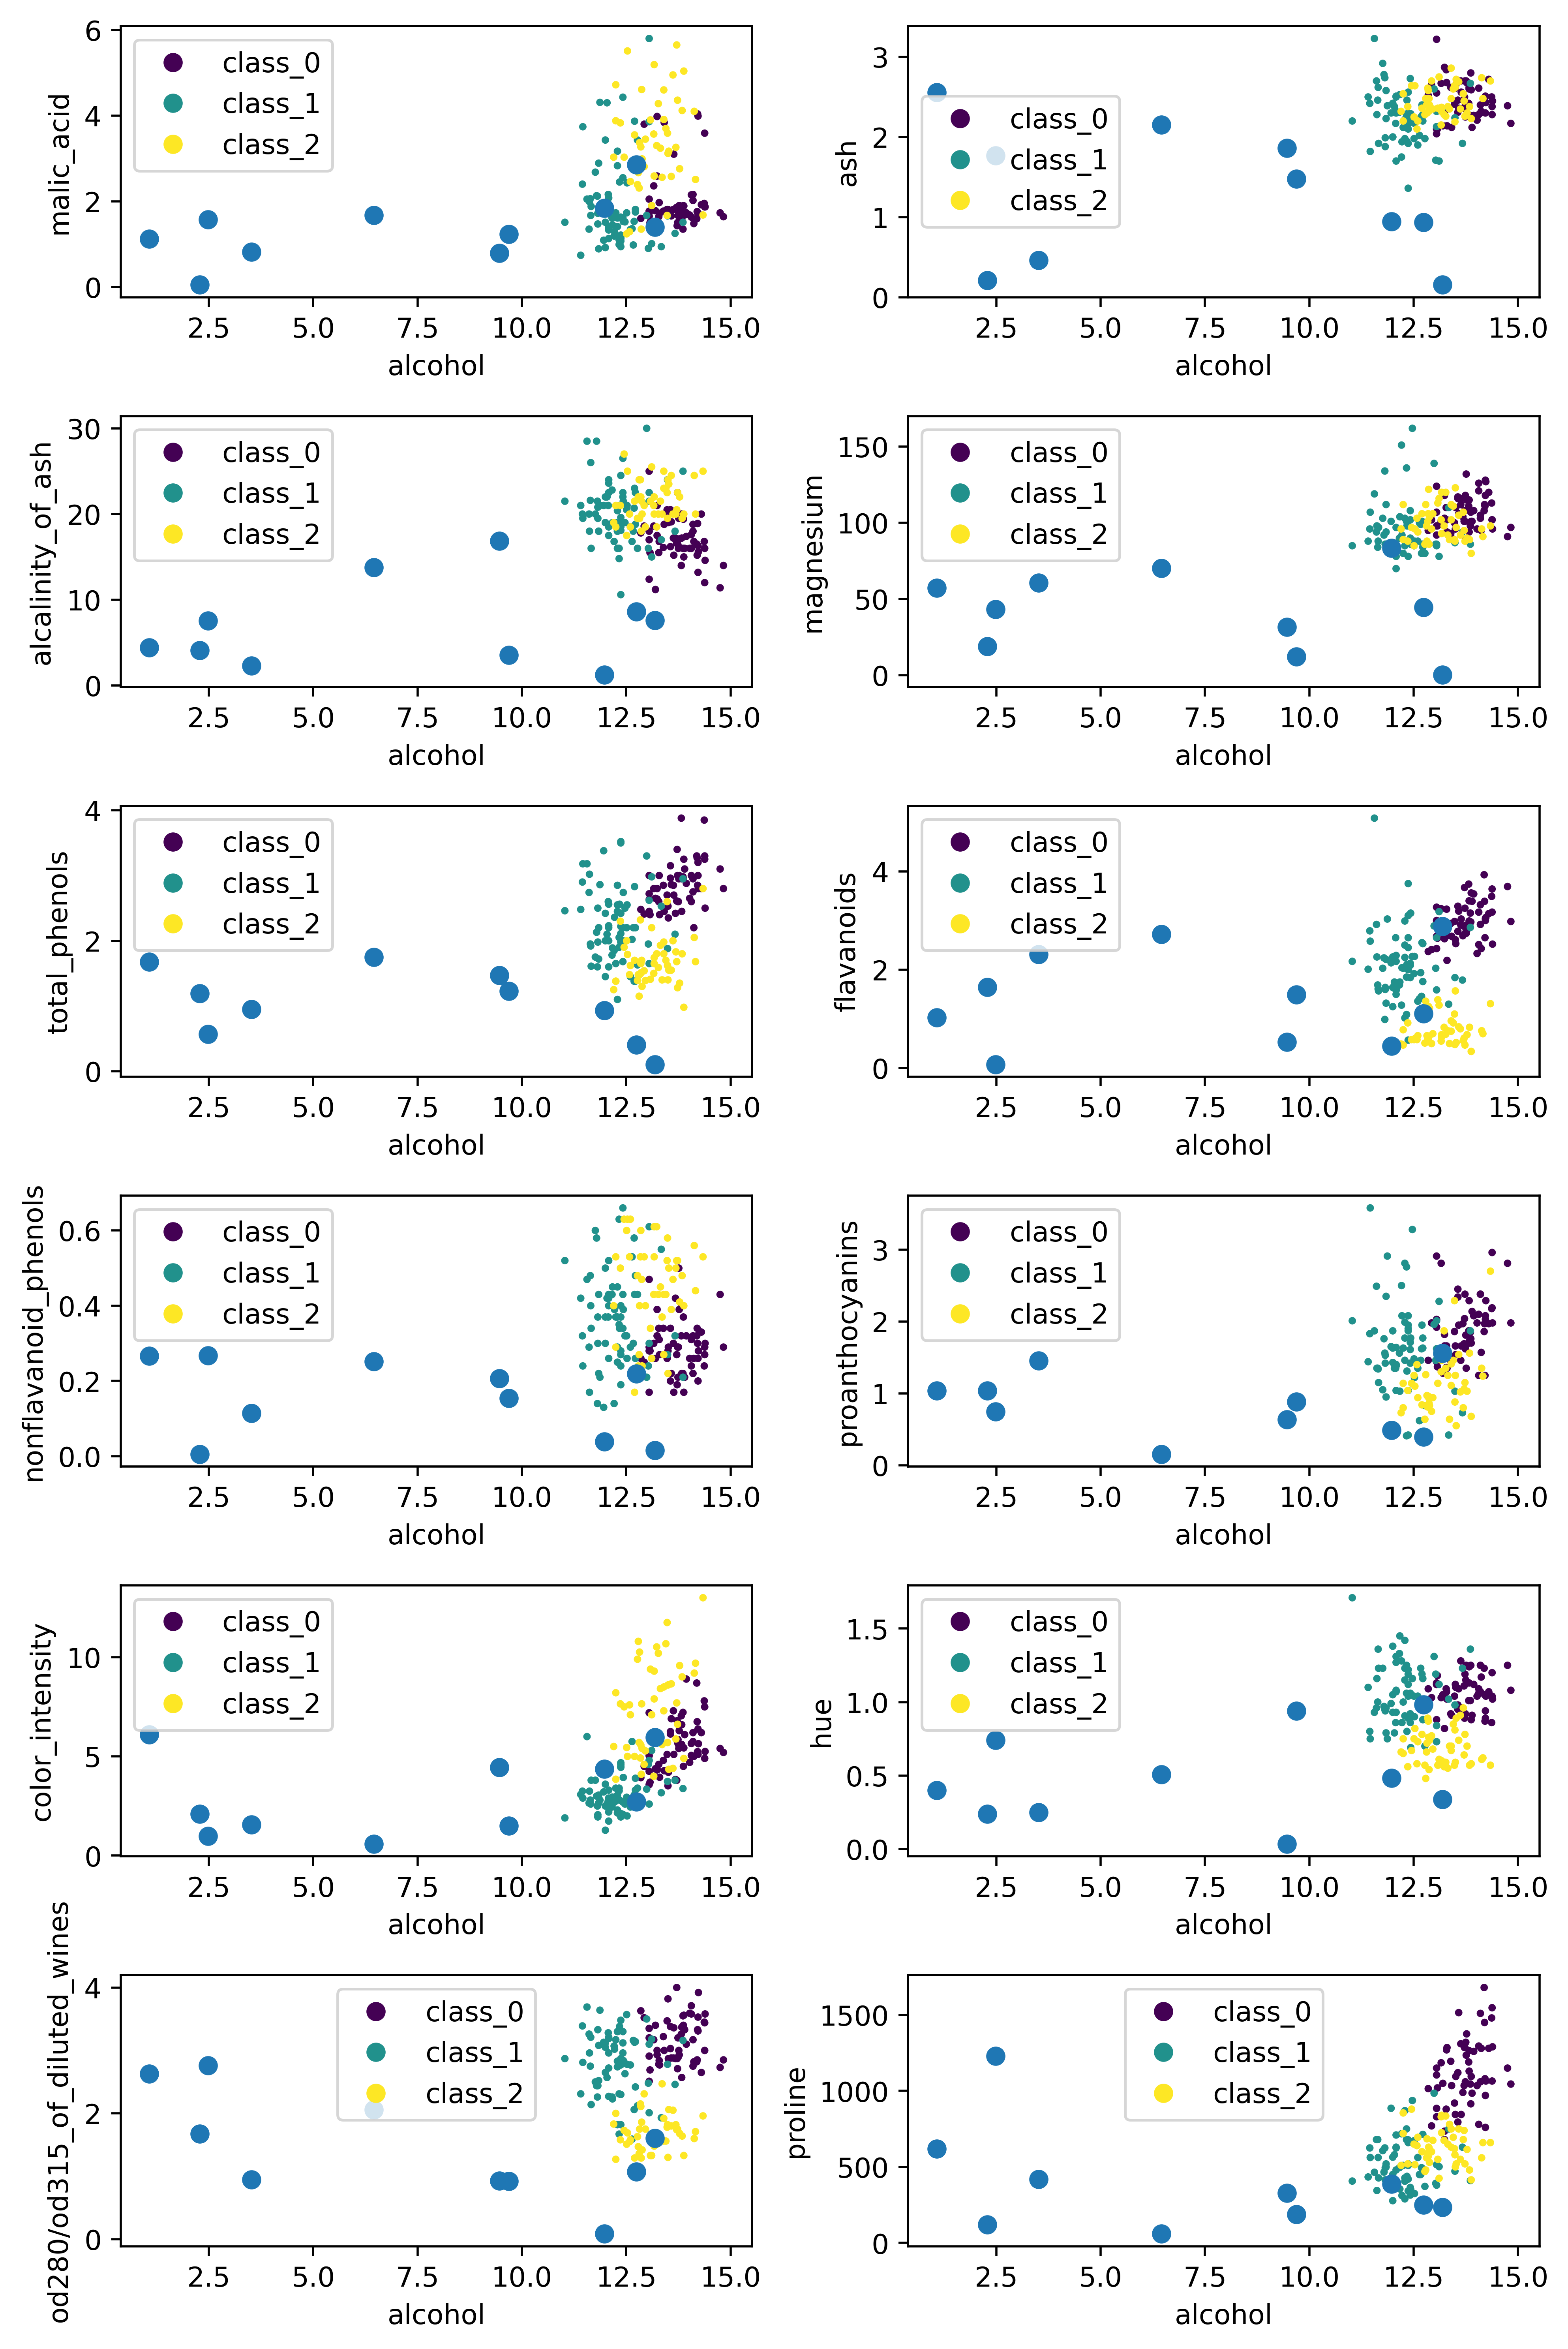

In [21]:

nrows, ncols = 6, 2
f = plt.figure(figsize = (8,12), dpi = 500)
legend_label=wine.target_names

for i in range(1, 13):
    ax = f.add_subplot(nrows, ncols, i)
    P=plt.scatter(wine.data[:,0],wine.data[:,i],s=3, c = wine.target)
    ax.scatter(unknown_wine.iloc[:,0], unknown_wine.iloc[:,i])
    plt.legend(P.legend_elements()[0],legend_label,prop = {'size' : 10})
    ax.set_xlabel(wine.feature_names[0],fontsize=10)
    ax.set_ylabel(wine.feature_names[i],fontsize=10)
plt.tight_layout()


Figure: Property-property plots with the unknown wine data as the bigger, blue circles. 

This type of data set comparison plot is the first thing you should always do when considering any type of machine learning applications. Immediately, we see this is a bad idea because the scales are completely different for all parameters. The ML applications, and I assume neural networks might be the extreme form of this, are specific to the patterns/variablity of a system. 

In [22]:
x_new = unknown_wine.iloc[:12]
x_new_scaled = scaler.transform(x_new)

class_prediction = mlp.predict(x_new_scaled)


# good practice to generate legible outputs 
class_label = {0:'class 0',1:'class 1',2:'class 2'}
class_holder=[]
unknown_prediction=[]

i=len(class_prediction)
n_range = range(0,i,1)
for n in n_range:
    class_holder=class_label[class_prediction[n]]
    unknown_prediction.append(class_holder)
    print(class_holder)

class 1
class 2
class 2
class 2
class 2
class 2
class 2
class 2
class 2
class 2


/Users/frank/opt/anaconda3/envs/OEAS895environment/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Text(0.5, 23.52222222222222, 'target')

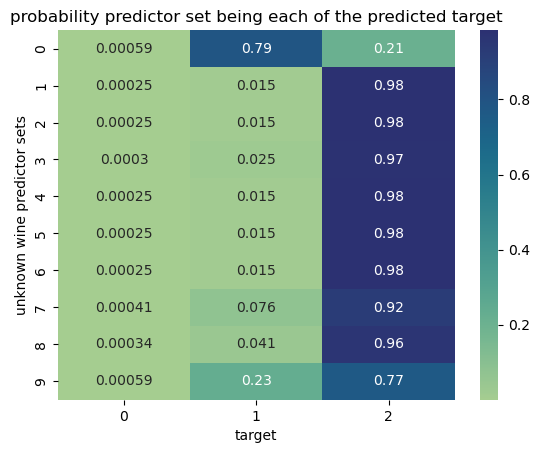

In [23]:
# predict the probabilities of the unknown data
proba = mlp.predict_proba(x_new_scaled)
plt.figure()
sns.heatmap (proba,annot=True,cmap='crest')
plt.title("probability predictor set being each of the predicted target")
plt.ylabel("unknown wine predictor sets")
plt.xlabel("target")

Figure: A heatmap describing the probablity of each predictor set being a given class. 

In [24]:
k_hold=[]
k_var=[]
u_var=unknown_wine.var()

for i in range(0, 13):
    print(wine.feature_names[i], 'ratio of variances')
    k_hold=wine.data[:,i].var()
    k_var.append(k_hold)
    print(wine.data[:,i].var()/u_var[i])
    


alcohol ratio of variances
0.02968669895247643
malic_acid ratio of variances
2.2263874785388857
ash ratio of variances
0.10668306193451485
alcalinity_of_ash ratio of variances
0.43755847233579237
magnesium ratio of variances
0.2864744097799512
total_phenols ratio of variances
1.3116276673778888
flavanoids ratio of variances
1.0551120877809386
nonflavanoid_phenols ratio of variances
1.4124307756641459
proanthocyanins ratio of variances
1.6112620432968854
color_intensity ratio of variances
1.286355452904543
hue ratio of variances
0.5366693478375708
od280/od315_of_diluted_wines ratio of variances
0.708363317433869
proline ratio of variances
0.8640800273597313


In theory a significant fraction of these ratios shoud be very close to one if the scales of variablity in the training/testing data set can be applicable to another dataset/system. It's possible only a few parameters drive the relationship (segway to PCAs). 

After comparing the variances and the property-property plots of the predictors, I have come to conclusion that the wine data does not have the range to train a model for the unknown wine data set. Which really renders all the information in this part meanless. This would offset all prediction probalities to a single class, as seen above in the prediction probablity heatmap and all the predictions isolated to class 2. This is a bit of a dizzying exercise. In hindsight, I see the value in having us set up to have a model fail. 